In [1]:
import time

import gym
import gym_snake
from ml_tools import q_learning

import matplotlib.pyplot as plt

In [2]:
from brain.snake_v2.brain import Brain

brain = Brain()

agent = q_learning.Agent(
  action_space=[0, 1, 2, 3],

  brain=brain,

  epsilon=1,
  epsilon_decay=0.9995,
  
  discount_factor=0.97,
  
  replay_batch_size=32,
  model_batch_size=32,
  
  model_learning_rate=0.00025,

  steps_to_train=10,
  steps_to_update_target=50,

  replay_memory_max_len=50000,
  replay_memory_min_len=2000,
)

env = gym.make('snake-v0')

score = 0
scores = []
game_num = 0

In [3]:
from ml_tools.ui import UI

ui = UI()
ui.connect("./public")
brain.ui = ui

In [4]:
raw_observation = env.reset()
agent.reset(raw_observation)

while True:
  ui.video.update_stream("raw", raw_observation)

  speed = int(ui.control.get_value('speed') or 100)
  if speed != 100:
    time.sleep(1 / speed)
    
  action = agent.act()
  raw_next_observation, reward, done, info = env.step(action)
  agent.step(reward, raw_next_observation)
  score += reward

  raw_observation = raw_next_observation
  if done:
    scores.append(score)
    score = 0

    game_num += 1
    if game_num >= 300:
      break
      
    raw_observation = env.reset()
    agent.reset(raw_observation)

1/1 [==============================] - 0s 112ms/step - loss: 0.0094


2022-04-01 20:12:04.696031: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 5ms/step - loss: 0.0010


1/1 [==============================] - 0s 4ms/step - loss: 0.0096


1/1 [==============================] - 0s 4ms/step - loss: 0.0188


1/1 [==============================] - 0s 4ms/step - loss: 0.0198


signal: interrupt


KeyboardInterrupt: 

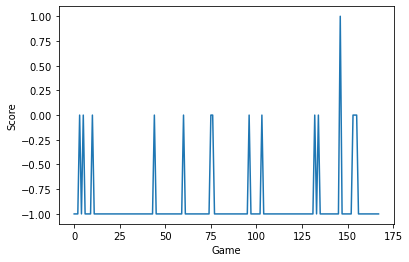

In [19]:
plt.plot(scores)
plt.xlabel("Game")
plt.ylabel("Score")
plt.savefig('plt.jpg')
plt.show()

In [8]:
agent.epsilon

0.1462437307835042

Exception in thread Thread-5 (start_reading_loop):
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/service/services.py", line 23, in start_reading_loop
    message = self.protocol.Read()
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/protocol.py", line 35, in Read
    return self.decoder.Read()
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/protocol.py", line 51, in Read
    n = d.r.recv_into(d.readBuffer)
ConnectionResetError: [Errno 54] Connection reset by peer
